importing libraries

In [28]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

get data from assurance_maladie.csv

In [ ]:
df = pd.read_csv('assurance_maladie.csv')
df.shape # Returns (number_of_rows, number_of_columns)
df.info() #serves as a quick and effective tool during EDA to get a
#high-level overview of the
#dataset's characteristics, data types, and the presence of missing values,
df.describe() #statistical summary of numerical columns, including count, mean, standard deviation, min, and max values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


get and remove duplicates


In [4]:
duplicates = df.duplicated() # Get duplicates
print(duplicates)
df = df.drop_duplicates() #Remove Duplicates
print(df)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 

identifying missing values

In [5]:
missing_values = df.isnull().sum() #Identifying Missing Values: The isnull() method, combined with sum(), helps identify missing values in each column.
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


using seaborn: easier syntax , high_level library 

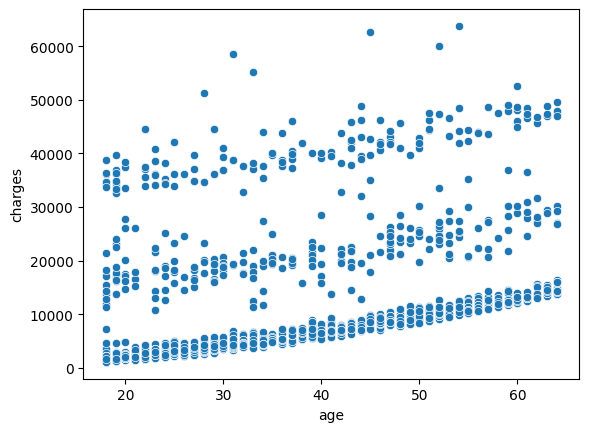

In [6]:
sns.scatterplot(data=df, x="age", y="charges") #Scatter Plot: To show the relationship between two numerical variables.
plt.show()

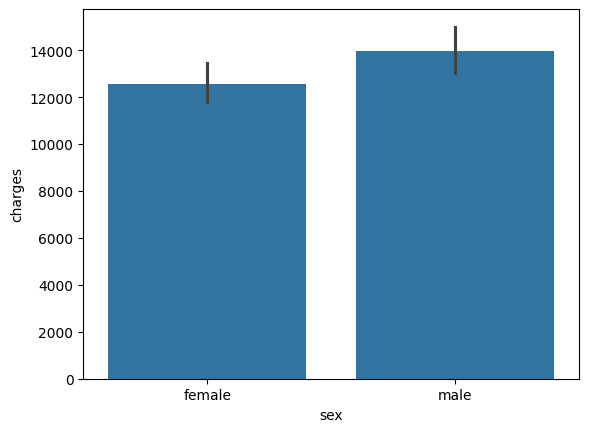

In [7]:
#Bar Plot: To display the average of a numerical variable across different categories.
sns.barplot(data=df, x="sex", y="charges")
plt.show()

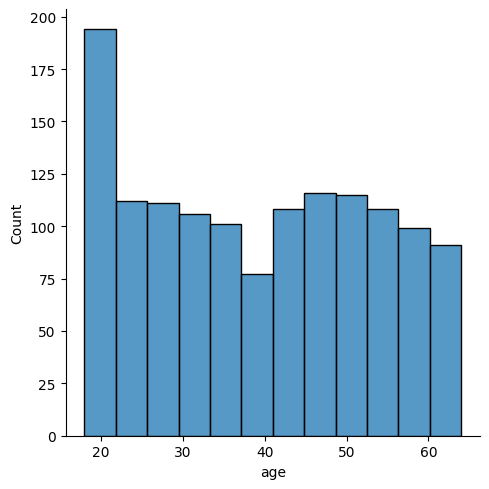

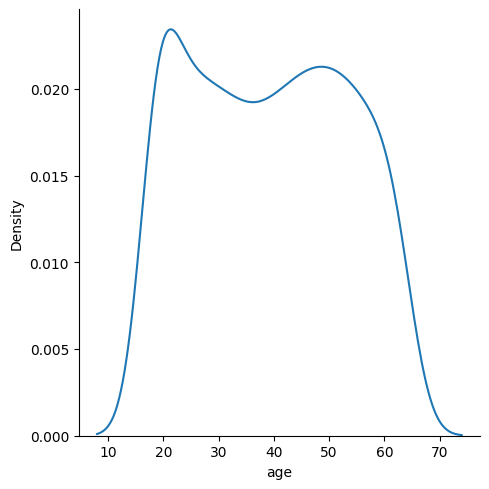

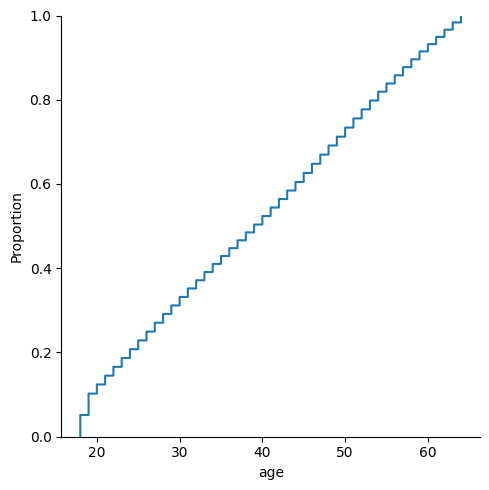

In [106]:
#Distribution Plot (Displot): To visualize the distribution of a single numerical variable.
sns.displot(data=df, x="age", kind="hist") # 'kind' can be 'hist', 'kde', 'ecdf'
plt.show()
sns.displot(data=df, x="age", kind="kde") # 'kind' can be 'hist', 'kde', 'ecdf'
plt.show()
sns.displot(data=df, x="age", kind="ecdf") # 'kind' can be 'hist', 'kde', 'ecdf'
plt.show()

Best Use Cases:

Pairplots: Ideal for initial exploration of a dataset with a moderate number of numerical variables to understand individual distributions and pairwise interactions.

Heatmaps: Particularly useful for visualizing correlation matrices, especially in datasets with a larger number of variables where examining every scatterplot would be overwhelming, or to quickly identify highly correlated features for feature engineering or model building.


using heatmaps


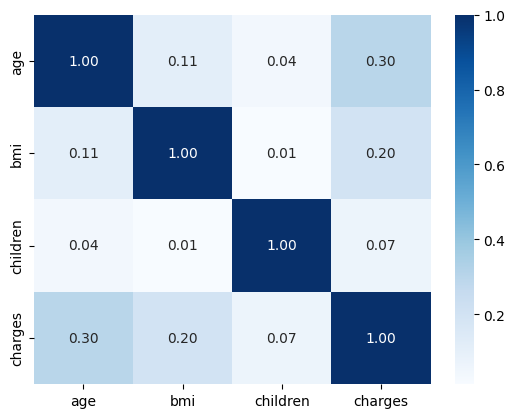

In [105]:
selected_columns = ['age' , 'bmi' , 'children' , 'charges']
df_num = df[selected_columns]
sns.heatmap(df_num.corr() , annot=True , cmap="Blues" , fmt=".2f" )
plt.show()


imputation: 


In [30]:
selected_columns_nums = ['age' , 'bmi' , 'children' , 'charges']

imputer_mean = SimpleImputer(strategy='mean')
df[selected_columns_nums] = imputer_mean.fit_transform(df[selected_columns_nums])
print(df)

selected_columns_string = ['sex' , 'smoker' , 'region']

mode_category = df[selected_columns_string[0]].mode()[0]

# Fill missing values with the calculated mode
df[selected_columns_string].fillna(mode_category, inplace=True)

print("\nDataFrame after mode imputation:")
print(df)


       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.000       3.0     no  southeast   4449.46200
3     33.0    male  22.705       0.0     no  northwest  21984.47061
4     32.0    male  28.880       0.0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970       3.0     no  northwest  10600.54830
1334  18.0  female  31.920       0.0     no  northeast   2205.98080
1335  18.0  female  36.850       0.0     no  southeast   1629.83350
1336  21.0  female  25.800       0.0     no  southwest   2007.94500
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[1337 rows x 7 columns]

DataFrame after mode imputation:
       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  1

C:\Users\abirm\AppData\Local\Temp\ipykernel_30724\3897998476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_columns_string].fillna(mode_category, inplace=True)


Détection et gestion des valeurs aberrantes

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: title={'center': 'charges'}, xlabel='region'>

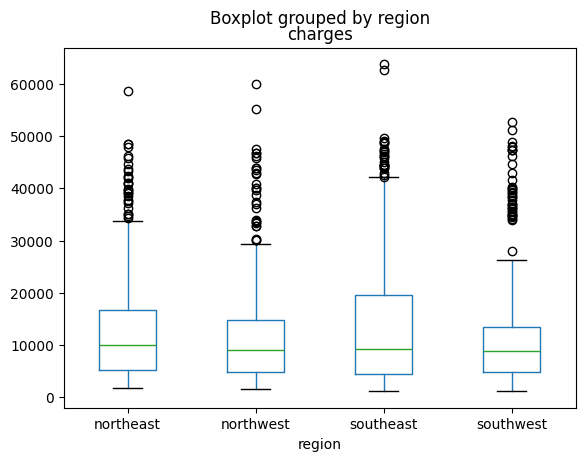

In [42]:
df.boxplot(by ='region', column =['charges'], grid = False)

one hot encoding:


In [44]:
catg_cols = df.select_dtypes(include='object').columns.to_list()
print(catg_cols)

['sex', 'smoker', 'region']


In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore' )
encoder.fit(df[catg_cols])

encoded_cols = list(encoder.get_feature_names_out(catg_cols))
df[encoded_cols] = encoder.transform(df[catg_cols])
print(df[encoded_cols])

      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0            1.0       0.0        0.0         1.0               0.0   
1            0.0       1.0        1.0         0.0               0.0   
2            0.0       1.0        1.0         0.0               0.0   
3            0.0       1.0        1.0         0.0               0.0   
4            0.0       1.0        1.0         0.0               0.0   
...          ...       ...        ...         ...               ...   
1333         0.0       1.0        1.0         0.0               0.0   
1334         1.0       0.0        1.0         0.0               1.0   
1335         1.0       0.0        1.0         0.0               0.0   
1336         1.0       0.0        1.0         0.0               0.0   
1337         1.0       0.0        0.0         1.0               0.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0  
1                  0.0   

split data

In [113]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['bmi' , 'sex' , 'region' , 'smoker'])
Y = df['bmi']
X.head()
Y.head()
X.shape
Y.shape
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , random_state=11 , test_size=0.2)
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape
X_train.describe().round(3)



,age,children,charges
count,1070.000,1070.000,1070.000
mean,39.357,1.068,13339.702
std,14.198,1.190,12191.344
min,18.000,0.000,1131.507
25%,26.000,0.000,4676.641
50%,40.000,1.000,9526.938
75%,52.000,2.000,17032.041
max,64.000,5.000,63770.428


Normalization vs Standardization

In [114]:


X1 = df[selected_columns_nums]
X2 = df[selected_columns_nums]
from sklearn.preprocessing import StandardScaler
scaleStandard = StandardScaler()
X1 = scaleStandard.fit_transform(X1)
X1 = pd.DataFrame(X1 , columns=selected_columns_nums)
X1.head()
X1.describe().round(3)



,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000
min,-1.510,-2.412,-0.909,-1.004
25%,-0.869,-0.716,-0.909,-0.705
50%,-0.015,-0.043,-0.079,-0.321
75%,0.840,0.661,0.751,0.278
max,1.765,3.686,3.241,4.172


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaleminmax = MinMaxScaler(feature_range=(0,1))
X2 = scaleminmax.fit_transform(X2)
X2 = pd.DataFrame(X2 , columns=selected_columns_nums)
X2.describe().round(3)



,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,0.461,0.396,0.219,0.194
std,0.305,0.164,0.241,0.193
min,0.000,0.000,0.000,0.000
25%,0.196,0.278,0.000,0.058
50%,0.457,0.388,0.200,0.132
75%,0.717,0.504,0.400,0.248
max,1.000,1.000,1.000,1.000


LinearRegression


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
lm = LinearRegression()
lm.fit(X_train , Y_train)
lm.coef_
cdf = pd.DataFrame(lm.coef_ , X.columns , columns=['Coef'])
#print(cdf)

y_pred = lm.predict(X_test)
mean_absolute_error(y_pred , Y_test)






4.584516339515796

In [130]:
mean_squared_error(y_pred , Y_test)

32.96561647887017

In [131]:
r2_score(y_pred , Y_test)

-20.776895964101406

RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=13)
rfr.fit(X_train , Y_train)
y_pred = rfr.predict(X_test)
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mean_absolute_error(y_pred , Y_test)

4.555759141791046

In [ ]:
mean_squared_error(y_pred_tra , Y_test)

34.56138186118472

In [125]:
r2_score(y_pred , Y_test)

-1.7653583189798874

XGBRegressor

In [126]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train , Y_train)
y_pred = xgb.predict(X_test)
mean_absolute_error(y_pred , Y_test)


4.817106126813747

In [140]:
y_pred_train = xgb.predict(X_train)
mean_absolute_error(y_pred_train , Y_train)

1.85134636495715

In [127]:
mean_squared_error(y_pred , Y_test)

39.29710339326022

In [128]:
r2_score(y_pred , Y_test)

-1.341028653896445

SVR

In [141]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train , Y_train)

y_pred = svr.predict(X_test)
mean_absolute_error(y_pred , Y_test)

4.412707357558956

In [137]:
mean_squared_error(y_pred , Y_test)

31.35793657145697

In [138]:
r2_score(y_pred , Y_test)

-9.6106380813945